In [12]:
# Enter the Python code you need in this cell.
# Importing the required method.
from ragraph.io.csv import from_csv
from ragraph.graph import Edge 
# Converting csv files into a graph object.
g = from_csv(
    nodes_path="./nodes-components.csv",
    edges_path="./edges-nodes-components.csv",
    csv_delimiter=";",
    iter_delimiter=",",  # Separates list elements within a cell.
)

reverted_edges = []
for e in g.edges:
    reverted_edges.append(
        Edge(
            source=e.target,
            target=e.source,
            kind=e.kind,
            labels=e.labels,
            weights=e.weights,
            annotations=e.annotations
        )
    )

for e in reverted_edges:
    g.add_edge(e)

components = [n for n in g.nodes if n.kind == "component"]

for ci in components:
    for cj in components:
        if ci == cj:
            continue

        targets_ci = set([t for t in g.targets_of(ci) if t.kind == "node"])
        targets_cj = set([t for t in g.targets_of(cj) if t.kind == "node"])

        # Note: when cycling home I realized you should use the Jaccard index. 
        # Number of nodes in which ci and cj
        n_common_nodes = len(targets_ci.intersection(targets_cj))
        # Number of nodes in which ci and/or cj is applied. 
        n_total_nodes = len(targets_ci.union(targets_cj))

        if n_total_nodes:
            jaccard_index = n_common_nodes / n_total_nodes 
        else:
            jaccard_index = 0

        g.add_edge(
            Edge(
                source=ci,
                target=cj,
                weights={"jaccard_index": jaccard_index}
            )
        )



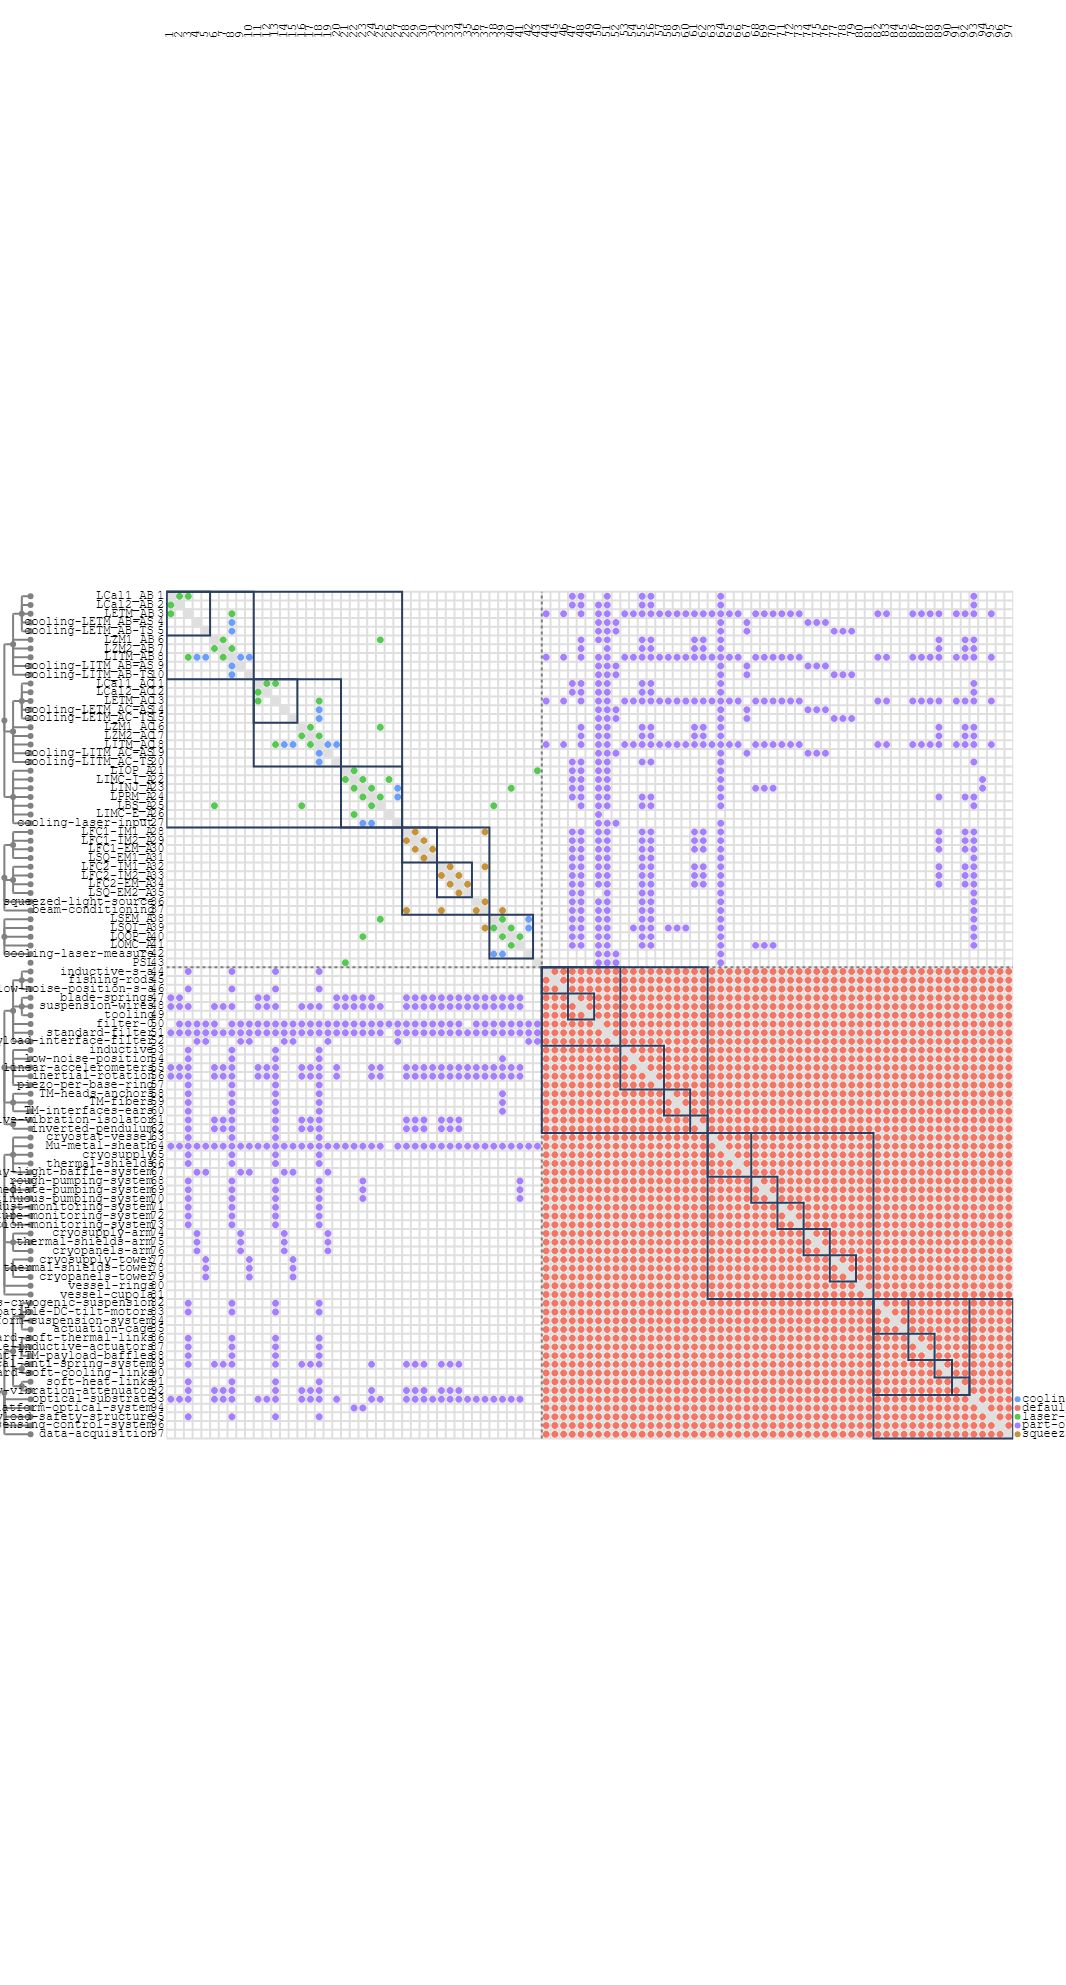

In [13]:
import ragraph.plot

dsm = ragraph.plot.mdm(
    leafs = g.nodes,
    edges = g.edges,
    style= ragraph.plot.Style(
        piemap=dict(
            display="labels",
            mode="relative",
            fields=g.edge_labels
        ),
    )
)

dsm

In [14]:
g.node_kinds

['component', 'node']

In [15]:
import ragraph.plot

mdm = ragraph.plot.mdm(
    leafs = g.nodes,
    edges = g.edges,
    style= ragraph.plot.Style(
        piemap=dict(
            display="weights",
            mode="relative",
            fields=g.edge_weight_labels
        ),
    )
)


mdm.write_image("./mdm_weighted_and_unclustered.svg")
#mdm.write_html("./mdm_weighted_and_unclustered.html")
#mdm

In [16]:
from ragraph.analysis.heuristics import markov_gamma 

markov_gamma(
    g,
    leafs=[n for n in g.nodes if n.kind == "component" and n.is_leaf],
    beta=8.0,
    mu=8.0,
    gamma=3.0,
    edge_weights=["jaccard_index"]
)

# recluster the components part of cluster "component.node0". You can however over the tree in the HTML to obtain the names of clusters.
markov_gamma(
    g,
    root=g["component.node0"],
    beta=6.0,
    mu=6.0,
    gamma=3.0,
    edge_weights=["jaccard_index"]
)

mdm = ragraph.plot.mdm(
    leafs = g.nodes,
    edges = g.edges,
    style= ragraph.plot.Style(
        piemap=dict(
            display="weights",
            mode="relative",
            fields=g.edge_weight_labels
        ),
    )
)


mdm.write_image("./mdm_weighted_and_clustered.svg")
#mdm.write_html("./mdm_weighted_and_clustered.html") 